# Preliminary Pulsar data analysis

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr) 
library(tidymodels)
library(GGally)
install.packages('ggfortify')
library(ggfortify)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## 1. import the data, tidy the data set, show summary statistics 

In [2]:
# import data
#temp  <- tempfile()
#download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip",temp)
pulsar <- read.csv("https://raw.githubusercontent.com/RowanYuwenLUO/dsci100_2022w1_group168/main/HTRU_2.csv",
                   header = FALSE, 
                   col.names = c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                                 "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness",
                                 "Class"))

In [3]:
# dimension of the data set
dim(pulsar) 

[1] 17898     9

- 17898 observations (rows)
- 9 variables (columns)

In [4]:
head(pulsar)

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
2,102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
3,103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
4,136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
5,88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
6,93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


In [5]:
# summary statistics for all 8 predictors
summary_table <- data.frame(cbind(summary(pulsar$integr.mean), summary(pulsar$integr.std),
                                  summary(pulsar$integr.kurtosis), summary(pulsar$integr.skewness),
                                  summary(pulsar$DMSNR.mean), summary(pulsar$DMSNR.std), 
                                  summary(pulsar$DMSNR.kurtosis), summary(pulsar$DMSNR.skewness))) 
colnames(summary_table) <- c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness")
summary_table

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min.,5.8125,24.77204,-1.87601118,-1.7918860,0.2132107,7.370432,-3.139270,-1.976976
1st Qu.,100.9297,42.37602,0.02709812,-0.1885717,1.9230769,14.437332,5.781506,34.960504
Median,115.0781,46.94748,0.22324002,0.1987104,2.8018395,18.461316,8.433515,83.064556
Mean,111.0800,46.54953,0.47785726,1.7702790,12.6143997,26.326515,8.303556,104.857709
3rd Qu.,127.0859,51.02320,0.47332518,0.9277831,5.4642559,28.428104,10.702959,139.309330
Max.,192.6172,98.77891,8.06952205,68.1016217,223.3921405,110.642211,34.539844,1191.000837


In [6]:
# check the missing data
sum(is.na(pulsar))

[1] 0

- no missing data here

In [7]:
# show number of observations in each class
count_data <- pulsar %>% 
    group_by(Class) %>% 
    summarise(n=n()) %>%
    mutate(freq = n / nrow(pulsar))
count_data 

Class,n,freq
<int>,<int>,<dbl>
0,16259,0.90842552
1,1639,0.09157448


- `0 is the negative examples`
- `1 is the positive examples`
- majority of the data (around 90%) are in class 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



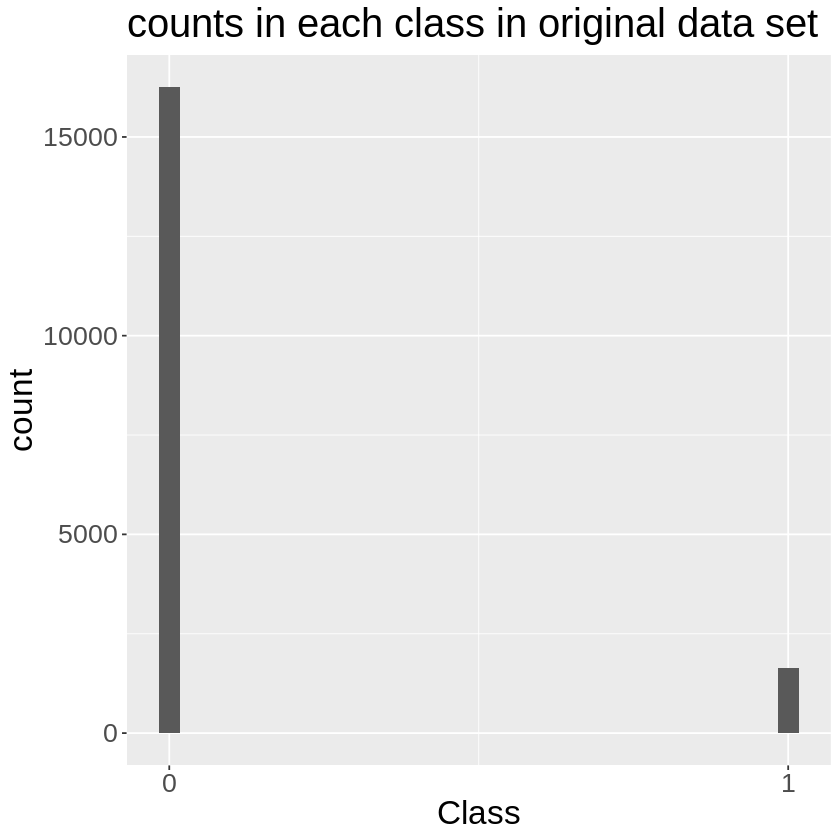

In [8]:
# display the distribution using histogram
ggplot() + 
  geom_histogram(pulsar, mapping = aes(Class)) + 
  ggtitle("counts in each class in original data set") + 
  scale_x_continuous(breaks = 0:1) + 
  theme(text = element_text(size=20)) 

## 2. split the data into training and testing sets

In [9]:
set.seed(123)
pulsar_split <- initial_split(pulsar, prop = 0.75, strata = Class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

In [10]:
# dimension of the training data set 
dim(pulsar_train) 

[1] 13423     9

In [11]:
# number of observations in each class
count_train <- pulsar_train %>% 
    group_by(Class) %>% 
    summarise(n=n()) %>%
    mutate(freq = n / nrow(pulsar_train))
count_train

Class,n,freq
<int>,<int>,<dbl>
0,12170,0.90665276
1,1253,0.09334724


In [12]:
# compare the data size with original data set
cbind(original = count_data, train = count_train)

original.Class,original.n,original.freq,train.Class,train.n,train.freq
<int>,<int>,<dbl>,<int>,<int>,<dbl>
0,16259,0.90842552,0,12170,0.90665276
1,1639,0.09157448,1,1253,0.09334724


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



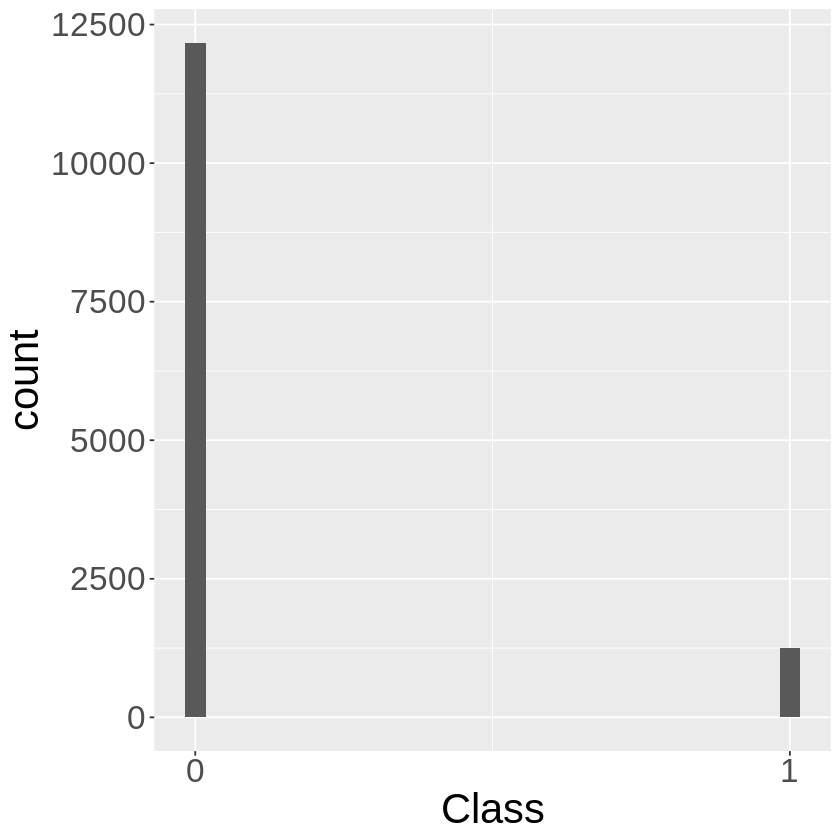

In [13]:
# display the distribution in training set using histogram
ggplot() + 
  geom_histogram(pulsar_train, mapping = aes(Class)) + 
  scale_x_continuous(breaks = 0:1) + 
  theme(text = element_text(size=25)) 

- training data set show the almost same proportion as the original dataset

## 3. Sample down the `0 (negative) class` in the training set: to deal with the imbalancing probelm.
### - let the number of data belongs to class 0 = the number of data belongs to class 1
### - so that proportion for the two classes are the same, equals to 0.5

In [14]:
set.seed(123)
train_c1 <- filter(pulsar_train, Class == 1)
train_c0 <- filter(pulsar_train, Class == 0)

sample_down_train <- pulsar_train %>% 
  filter(Class ==0) %>%
  sample_n(nrow(train_c1)) %>%
  rbind(train_c1)

In [15]:
# dimension for the training data after sampling down
dim(sample_down_train)

[1] 2506    9

- 2506 observations
- 9 variables

### now use the training set after sampling down to do the analysis !

In [16]:
# calculate the means of the predictor variables
predictors_mean <- sample_down_train %>% 
  select(-Class) %>% 
  colMeans() %>%
  data.frame()
colnames(predictors_mean) <- "mean"
predictors_mean

,mean
,<dbl>
integr.mean,86.256958
integr.std,42.861345
integr.kurtosis,1.700721
integr.skewness,8.177292
DMSNR.mean,29.887667
DMSNR.std,40.028187
DMSNR.kurtosis,5.824315
DMSNR.skewness,67.323829


#### large differences between the mean of these predictors:
the largest one is about 86, while the smallest one is only 1.7


## 4. Scale the training set after sampling down

In [17]:
all_predictors_name <- colnames(sample_down_train[, 1:8])

scaled_train <- sample_down_train %>% 
  mutate_at(all_predictors_name, ~(scale(.) %>% as.vector))

In [18]:
train_summary_table <- data.frame(cbind(summary(scaled_train$integr.mean), summary(scaled_train$integr.std),
                                  summary(scaled_train$integr.kurtosis), summary(scaled_train$integr.skewness),
                                  summary(scaled_train$DMSNR.mean), summary(scaled_train$DMSNR.std), 
                                  summary(scaled_train$DMSNR.kurtosis), summary(scaled_train$DMSNR.skewness))) 
colnames(train_summary_table) <- c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness")
train_summary_table

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min.,-2.063690e+00,-2.167562e+00,-1.713450e+00,-7.536754e-01,-6.980701e-01,-1.310994e+00,-1.723480e+00,-6.851254e-01
1st Qu.,-8.460459e-01,-8.084394e-01,-7.530860e-01,-6.354165e-01,-6.467820e-01,-9.281084e-01,-8.585520e-01,-6.502978e-01
Median,2.374179e-01,4.664097e-02,-5.150877e-01,-5.389346e-01,-5.436098e-01,-3.045725e-01,-1.336230e-01,-3.934826e-01
Mean,1.698600e-16,3.169741e-16,1.794415e-17,-3.234156e-17,-1.430887e-17,-1.394447e-16,6.247955e-17,-9.230731e-18
3rd Qu.,8.099643e-01,7.350632e-01,6.425342e-01,2.861652e-01,2.393543e-01,9.147824e-01,6.931118e-01,3.099548e-01
Max.,2.539729e+00,4.905129e+00,3.173435e+00,4.711405e+00,4.163813e+00,2.722087e+00,5.372250e+00,9.950703e+00


In [19]:
scaled_predictors_mean <- scaled_train %>% 
  select(-Class) %>% 
  colMeans() %>%
  data.frame()
colnames(scaled_predictors_mean) <- "mean"
scaled_predictors_mean

,mean
,<dbl>
integr.mean,1.686572e-16
integr.std,3.168992e-16
integr.kurtosis,1.484137e-17
integr.skewness,-3.649426e-17
DMSNR.mean,-1.664808e-17
DMSNR.std,-1.331459e-16
DMSNR.kurtosis,5.974620e-17
DMSNR.skewness,-7.091184e-18


#### After scaling the predictos in thetraining set, every predictor has mean around 0.

In [20]:
head(scaled_train)

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.9530132,1.8106637,-0.8168831,-0.7010886,-0.6561685,-1.0755796,0.89087155,0.7126506,0
2,1.0886967,3.6593985,-0.8675785,-0.7536754,1.5101584,1.5944108,-1.15877415,-0.6803251,0
3,1.3450323,0.5883488,-1.0096455,-0.6209852,-0.6637171,-1.0960985,1.17488947,1.0446210,0
4,0.7439764,1.0821099,-0.6363887,-0.6296116,-0.3042426,0.5808810,-0.59015834,-0.5998106,0
5,0.8339644,-0.0828916,-0.6085113,-0.5989493,-0.5693893,-0.3795561,-0.00139643,-0.3265444,0
6,-0.1064005,-0.6559463,-0.4430658,-0.4385813,-0.6034269,-0.5059058,0.22646530,-0.1780283,0


## 5. visualize the training set

In [21]:
pivot_train <- scaled_train %>%
  pivot_longer(cols = integr.mean:DMSNR.skewness,
               names_to = "predictor", 
               values_to = "value")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



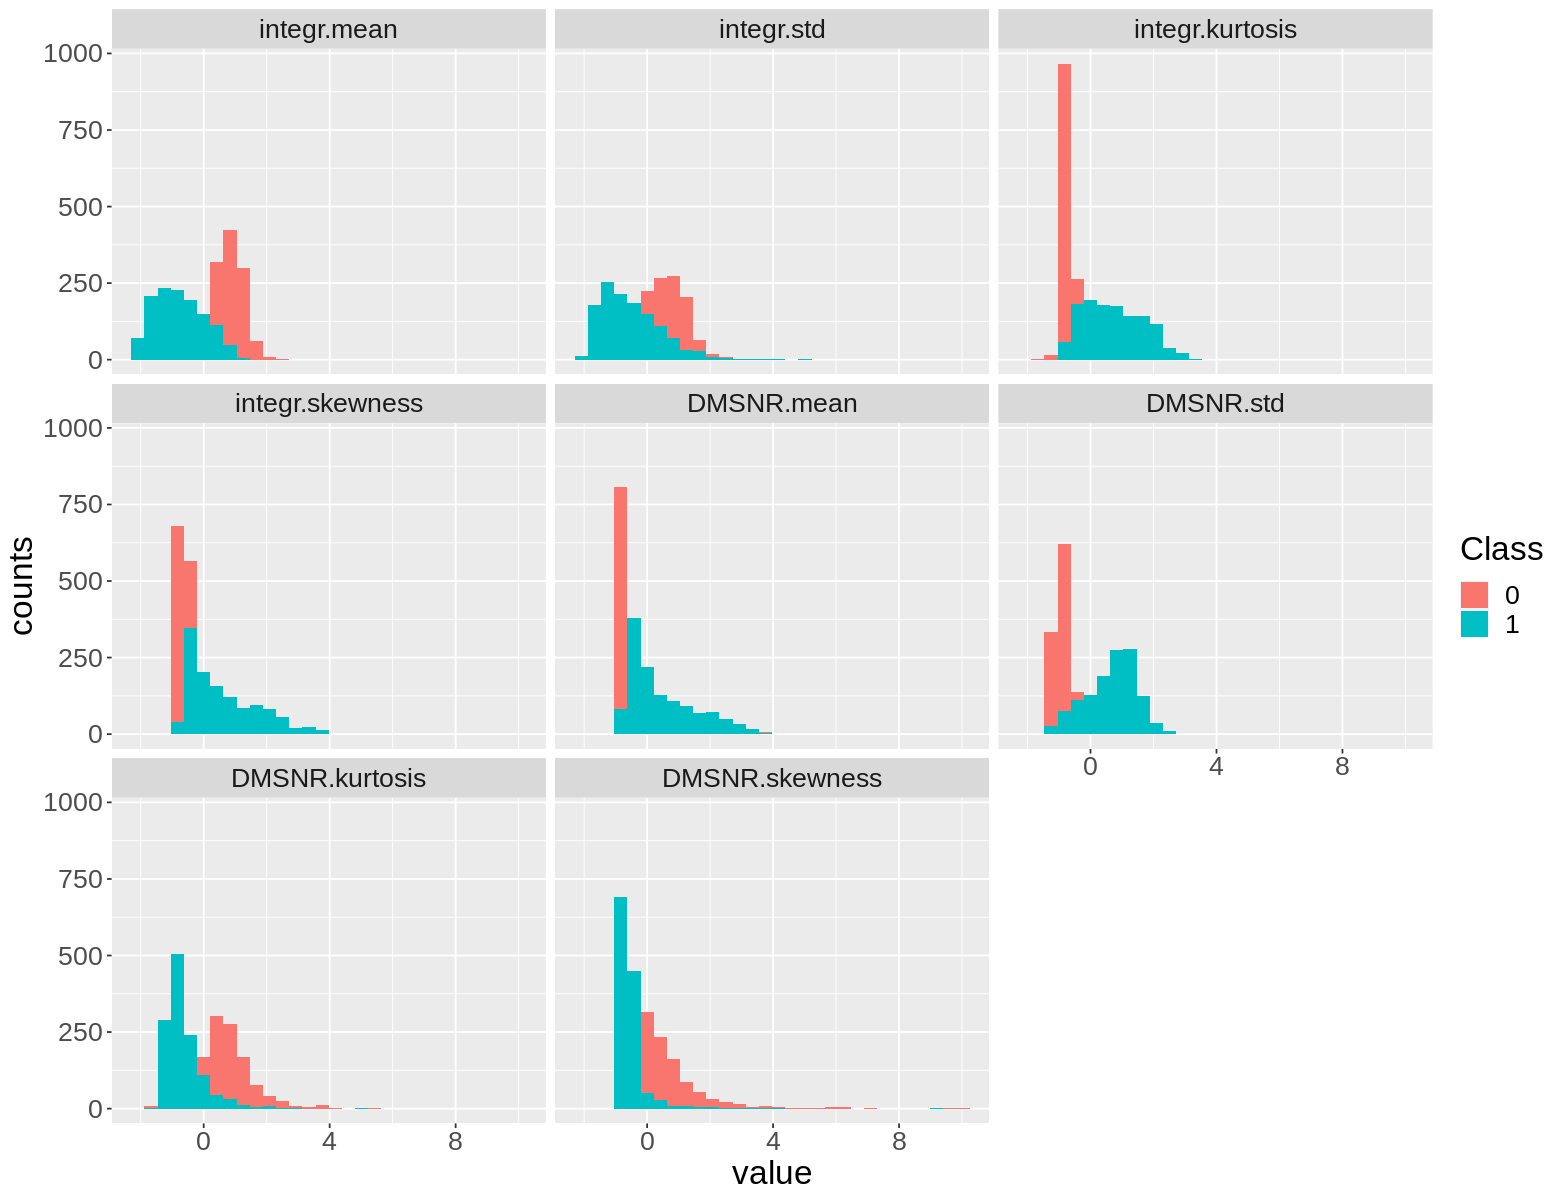

In [22]:
# histogram for all 8 variables
options(repr.plot.width = 13, repr.plot.height = 10) 

pivot_train %>% 
  ggplot(aes(x = value, fill = as.factor(Class))) + 
  geom_histogram(position = "identity") + 
  facet_wrap(~ factor(predictor, 
                      levels = c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                                 "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness"))) +
  xlab("value") + 
  ylab("counts") + 
  labs(fill = "Class") +
  theme(text = element_text(size=20)) 

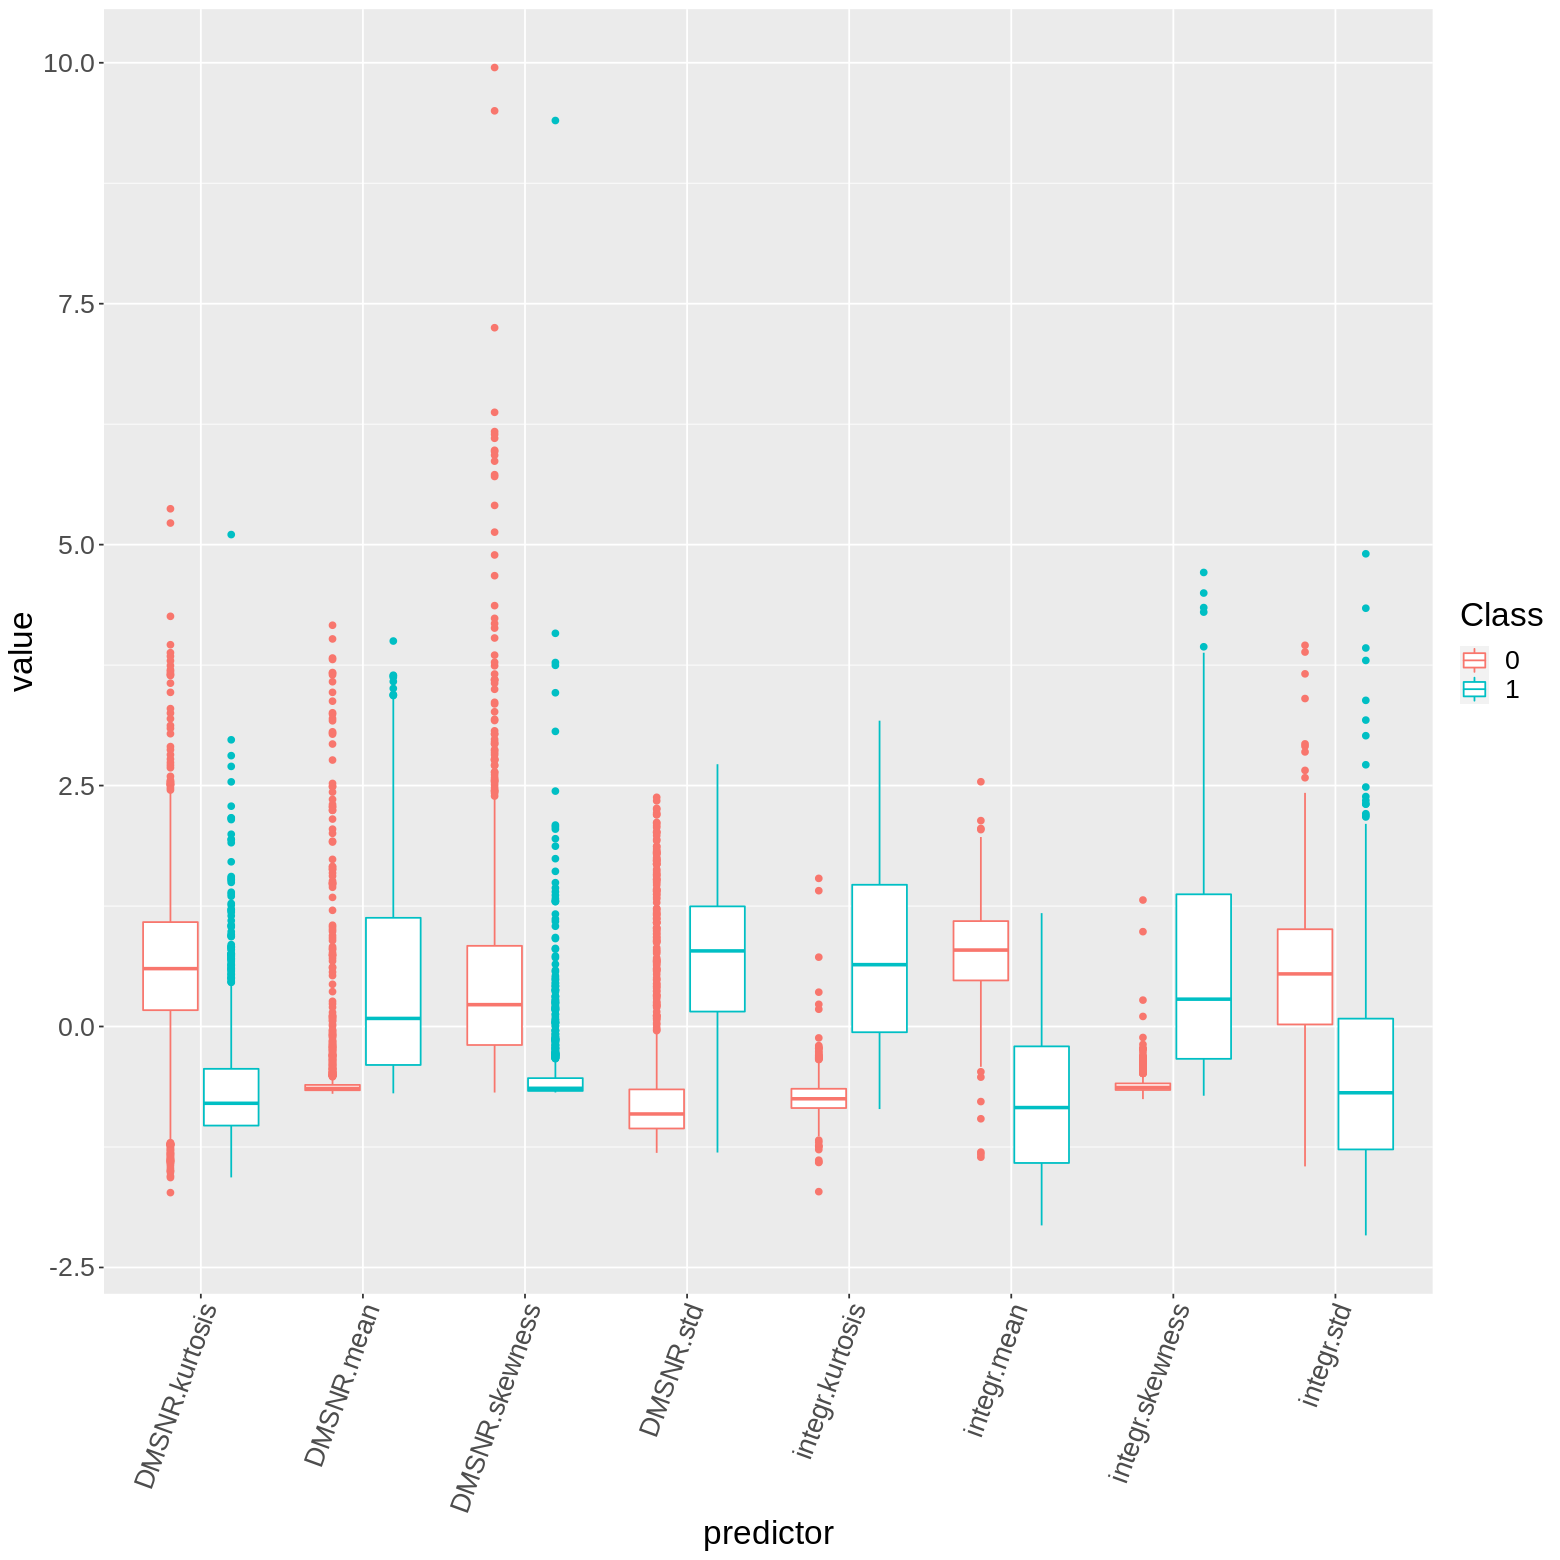

In [23]:
# boxplot
options(repr.plot.width = 13, repr.plot.height = 13) 

ggplot(pivot_train, aes(x=predictor, y=value, color = as.factor(Class))) + 
  geom_boxplot() + 
  labs(color = "Class") +
  theme(axis.text.x = element_text(angle = 70, hjust = 1),
        text = element_text(size=20)) 

##### Both histogram and Boxplot are used to explore the relationship between continuous variables and a categorical variable.
##### show the differences between the each category class
- `integr.mean`, `integr.std`, `DMSNR.kurtosis`, `DMSNR.skewness` predictors has larger mean in Class 0;
- `integr.kurtosis`, `integr.skewness`, `DMSNR.std`, `DMSNR.mean` predictors has larger mean in Class 1;

-  data from `DMSNR.skewness` in Class 0 has the most spread distribution;
-  all predictors have a lot of outliers shown from the boxplot;
-  almost all predictors in both Classes show skewed to right distribution, except the `DMSNR.std` variable.

## 6.1 Classification with Forward selection for predictors

In [24]:
set.seed(123)

pulsar_all_training <- scaled_train %>%
  mutate(Class = as.factor(Class))

# tuning the parameter - find best k when all predictors included
pulsar_recipe <- recipe(Class ~ . , data = pulsar_all_training)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

# create a 10-fold cross-validation object
vfold <- vfold_cv(pulsar_all_training, v = 10, strata = Class)

# try K with different values:  1 to 100 (stepping by 5) 
ks <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# accuracy results
knn_results <- workflow() %>%
  add_recipe(pulsar_recipe) %>%
  add_model(knn_tune) %>%
  tune_grid(resamples = vfold, grid = ks) %>%
  collect_metrics() 
accuracies <- knn_results %>%
  filter(.metric == "accuracy")

accuracies[which.max(accuracies$mean), ]
k <- accuracies[which.max(accuracies$mean), ]$neighbors

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.9297714,10,0.003772848,Preprocessor1_Model03


In [25]:
names <- colnames(pulsar_all_training 
                  %>% select(-Class))
example_formula <- paste("Class", "~", paste(names, collapse="+"))
example_formula 

[1] "Class ~ integr.mean+integr.std+integr.kurtosis+integr.skewness+DMSNR.mean+DMSNR.std+DMSNR.kurtosis+DMSNR.skewness"

In [26]:
# forward selection
set.seed(123)

accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 10-fold cross-validation
vfold <- vfold_cv(pulsar_all_training, v = 10, strata = Class)
# store the total number of predictors
n_total <- length(names)
# stores selected predictors
selected <- c()

In [27]:
# forward selection
set.seed(123)
for (i in 1:n_total) {
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Class", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        pulsar_recipe <- recipe(as.formula(model_string), 
                                data = pulsar_all_training)

        acc <- workflow() |>
          add_recipe(pulsar_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = vfold, grid = k) |> 
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Class ~ integr.kurtosis,0.9205683
2,Class ~ integr.kurtosis+DMSNR.std,0.9389556
3,Class ~ integr.kurtosis+DMSNR.std+DMSNR.mean,0.9397619
4,Class ~ integr.kurtosis+DMSNR.std+DMSNR.mean+integr.skewness,0.9397683
5,Class ~ integr.kurtosis+DMSNR.std+DMSNR.mean+integr.skewness+DMSNR.skewness,0.9377651
6,Class ~ integr.kurtosis+DMSNR.std+DMSNR.mean+integr.skewness+DMSNR.skewness+DMSNR.kurtosis,0.9361714
7,Class ~ integr.kurtosis+DMSNR.std+DMSNR.mean+integr.skewness+DMSNR.skewness+DMSNR.kurtosis+integr.mean,0.9329587
8,Class ~ integr.kurtosis+DMSNR.std+DMSNR.mean+integr.skewness+DMSNR.skewness+DMSNR.kurtosis+integr.mean+integr.std,0.9305746


In [28]:
accuracies[which.max(accuracies$accuracy),]

size,model_string,accuracy
<int>,<chr>,<dbl>
4,Class ~ integr.kurtosis+DMSNR.std+DMSNR.mean+integr.skewness,0.9397683


In [49]:
set.seed(123)

forward_select <- scaled_train %>%
  select(c(integr.kurtosis, DMSNR.std, 
           DMSNR.mean, integr.skewness, Class)) %>%
  mutate(Class = as.factor(Class))

# tuning the parameter - find best k with this combination of predictors
pulsar_recipe <- recipe(Class ~ . , data = forward_select)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

# create a 10-fold cross-validation object
vfold <- vfold_cv(forward_select, v = 10, strata = Class)

# try K with different values:  1 to 100 (stepping by 5) 
ks <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# accuracy results
knn_results <- workflow() %>%
  add_recipe(pulsar_recipe) %>%
  add_model(knn_tune) %>%
  tune_grid(resamples = vfold, grid = ks) %>%
  collect_metrics() 
accuracies <- knn_results %>%
  filter(.metric == "accuracy")

accuracies[which.max(accuracies$mean), ]
k <- accuracies[which.max(accuracies$mean), ]$neighbors

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,accuracy,binary,0.9393556,10,0.003583601,Preprocessor1_Model04


In [54]:
# build the model using the predictors choose from forward selection and tunned k
set.seed(123)
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k) |>
  set_engine("kknn") %>%
  set_mode("classification")
pulsar_fit_forward <- workflow() %>%
  add_recipe(pulsar_recipe_forward) %>%
  add_model(pulsar_spec) %>%
  fit(data = forward_select)

In [55]:
# predict the test set
set.seed(123)

preds_forward <- predict(pulsar_fit_forward, pulsar_test) %>%
  bind_cols(pulsar_test)

# prediction results
# accuracy
preds_forward %>% mutate(Class = as.factor(Class)) %>%
  metrics(truth = Class, estimate = .pred_class) %>%
  filter(.metric == "accuracy") 
# confusion matrix
preds_forward %>%
  mutate(Class = as.factor(Class)) %>%
  conf_mat(truth = Class, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.09899441


          Truth
Prediction    0    1
         0   65    8
         1 4024  378

- the result from forward selection predictors show that the accuracy is very low and the confusion matrix indicating that almost all predictions are misclassified for both classes.

## 6.2 Classification: choosing predictors using correlation matrix

#### In the dataset, the Categorical variable Class `Class` has been tranformed into a `dummy variable`: has values equal to either 0 or 1.

In [31]:
corr.mat <- cor(scaled_train)
corr.mat
corr.mat[ , ncol(corr.mat), drop = FALSE] 

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness,Class
integr.mean,1.0000000,0.6872586,-0.9422078,-0.8437732,-0.5669821,-0.6332698,0.6017493,0.4353288,-0.7750963
integr.std,0.6872586,1.0000000,-0.7253721,-0.7359978,-0.2027974,-0.3349863,0.3179430,0.2526690,-0.5205059
integr.kurtosis,-0.9422078,-0.7253721,1.0000000,0.9632965,0.5881824,0.6483486,-0.6119384,-0.4403267,0.7349228
integr.skewness,-0.8437732,-0.7359978,0.9632965,1.0000000,0.5384755,0.5636006,-0.5311853,-0.3762123,0.6084140
DMSNR.mean,-0.5669821,-0.2027974,0.5881824,0.5384755,1.0000000,0.7846939,-0.6949288,-0.4344707,0.4673093
DMSNR.std,-0.6332698,-0.3349863,0.6483486,0.5636006,0.7846939,1.0000000,-0.8769701,-0.6560657,0.6662586
DMSNR.kurtosis,0.6017493,0.3179430,-0.6119384,-0.5311853,-0.6949288,-0.8769701,1.0000000,0.9151934,-0.6282438
DMSNR.skewness,0.4353288,0.2526690,-0.4403267,-0.3762123,-0.4344707,-0.6560657,0.9151934,1.0000000,-0.4900915
Class,-0.7750963,-0.5205059,0.7349228,0.6084140,0.4673093,0.6662586,-0.6282438,-0.4900915,1.0000000


,Class
integr.mean,-0.7750963
integr.std,-0.5205059
integr.kurtosis,0.7349228
integr.skewness,0.6084140
DMSNR.mean,0.4673093
DMSNR.std,0.6662586
DMSNR.kurtosis,-0.6282438
DMSNR.skewness,-0.4900915
Class,1.0000000


##### By looking at the last column of the correlation matrix, 
##### find `integr.mean`, `integr.kurtosis` are the most correlated predictors to `Class`, 
##### the absolute value of their correlation with `Class` are the largest;
##### and then are the `DMSNR.std`, `DMSNR.kurtosis`, `integr.skewness` predictors.

### Thus, we will use the 5 predictors to do the classification analysis with `k-nn` method
`integr.mean`, `integr.kurtosis`, `DMSNR.std`, `DMSNR.kurtosis`, `integr.skewness` 

### use predictors chosen from correlation matrix to do the KNN-Classification

In [32]:
pulsar_training <- scaled_train %>%
  select(c(integr.mean, integr.kurtosis, integr.skewness,
           DMSNR.std, DMSNR.kurtosis, Class)) %>%
  mutate(Class = as.factor(Class))

#### cross validation - classification with 10 folds

In [33]:
vfold <- vfold_cv(pulsar_training, v = 10, strata = Class)

#### tuning the parameter

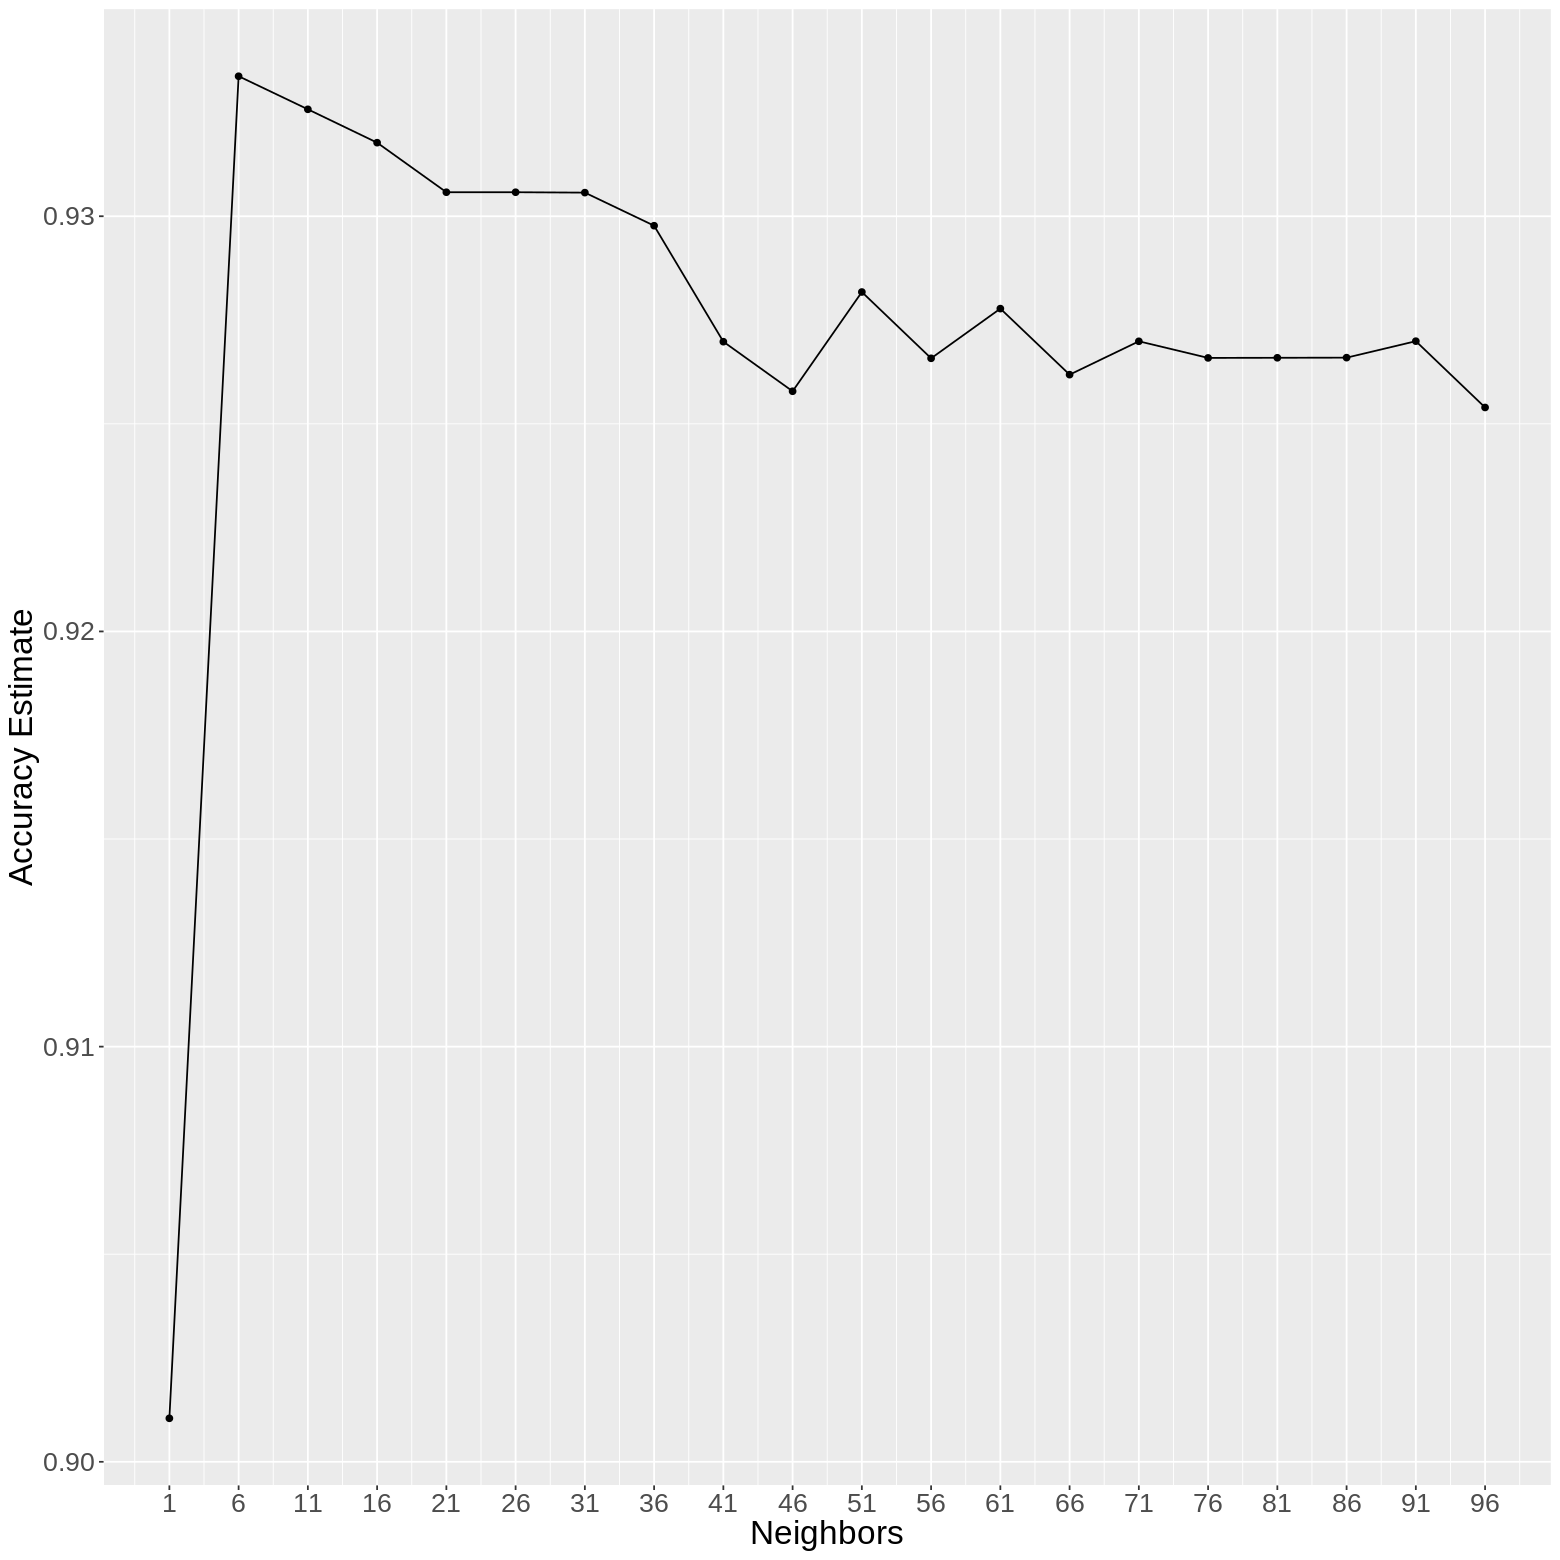

In [34]:
set.seed(123)
pulsar_recipe <- recipe(Class ~ . , data = pulsar_training) # training data are already scaled

## tuning the parameter
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

# try K with different values:  1 to 100 (stepping by 5)
ks <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() %>%
  add_recipe(pulsar_recipe) %>%
  add_model(knn_tune) %>%
  tune_grid(resamples = vfold, grid = ks) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")

# accuracy_vs_k 
accuracy_vs_k_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", main = "Accuracy VS K") + 
  theme(text = element_text(size = 20)) + 
  scale_x_continuous(breaks = ks$neighbors)
accuracy_vs_k_plot

In [35]:
# get the best k
accuracies[which.max(accuracies$mean), ]
best_k <- accuracies[which.max(accuracies$mean), ]$neighbors

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.9333714,10,0.004394289,Preprocessor1_Model02


- the results show that when k (the number of neighbors) = 6, we have the highest accuracy, which is about 0.93.

In [36]:
# build the model using the best k choose from examine the accuracies
set.seed(123)
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") %>%
  set_mode("classification")
pulsar_fit <- workflow() %>%
  add_recipe(pulsar_recipe) %>%
  add_model(pulsar_spec) %>%
  fit(data = pulsar_training)

In [37]:
# predict the test set
set.seed(123)
preds <- predict(pulsar_fit, pulsar_test) %>%
  bind_cols(pulsar_test)

# accuracy
metrics <- preds %>% mutate(Class = as.factor(Class)) %>%
  metrics(truth = Class, estimate = .pred_class) %>%
  filter(.metric == "accuracy") 
metrics

# confusion matrix
confusion_mat <- preds %>%
  mutate(Class = as.factor(Class)) %>%
  conf_mat(truth = Class, estimate = .pred_class)
confusion_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9264804


          Truth
Prediction    0    1
         0 4089  329
         1    0   57

#### prediction results:

- The accuracy is high: 0.93: which means that 93% of the predicted class is the same as the actual class. 

- Especially when the true Class is 0, all predicted class are true in our seed.

- However, it performs not so well when the true class is Class 1.
    
> From the confusion matrix we can see that all predictions for Class 0 when true Class is 0 are correct.
    
> While when true class is 1, about $\frac{329}{329+57} = 85\%$ were misclassified as class 0.



# 7. Discussion: multicollinearity problem

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



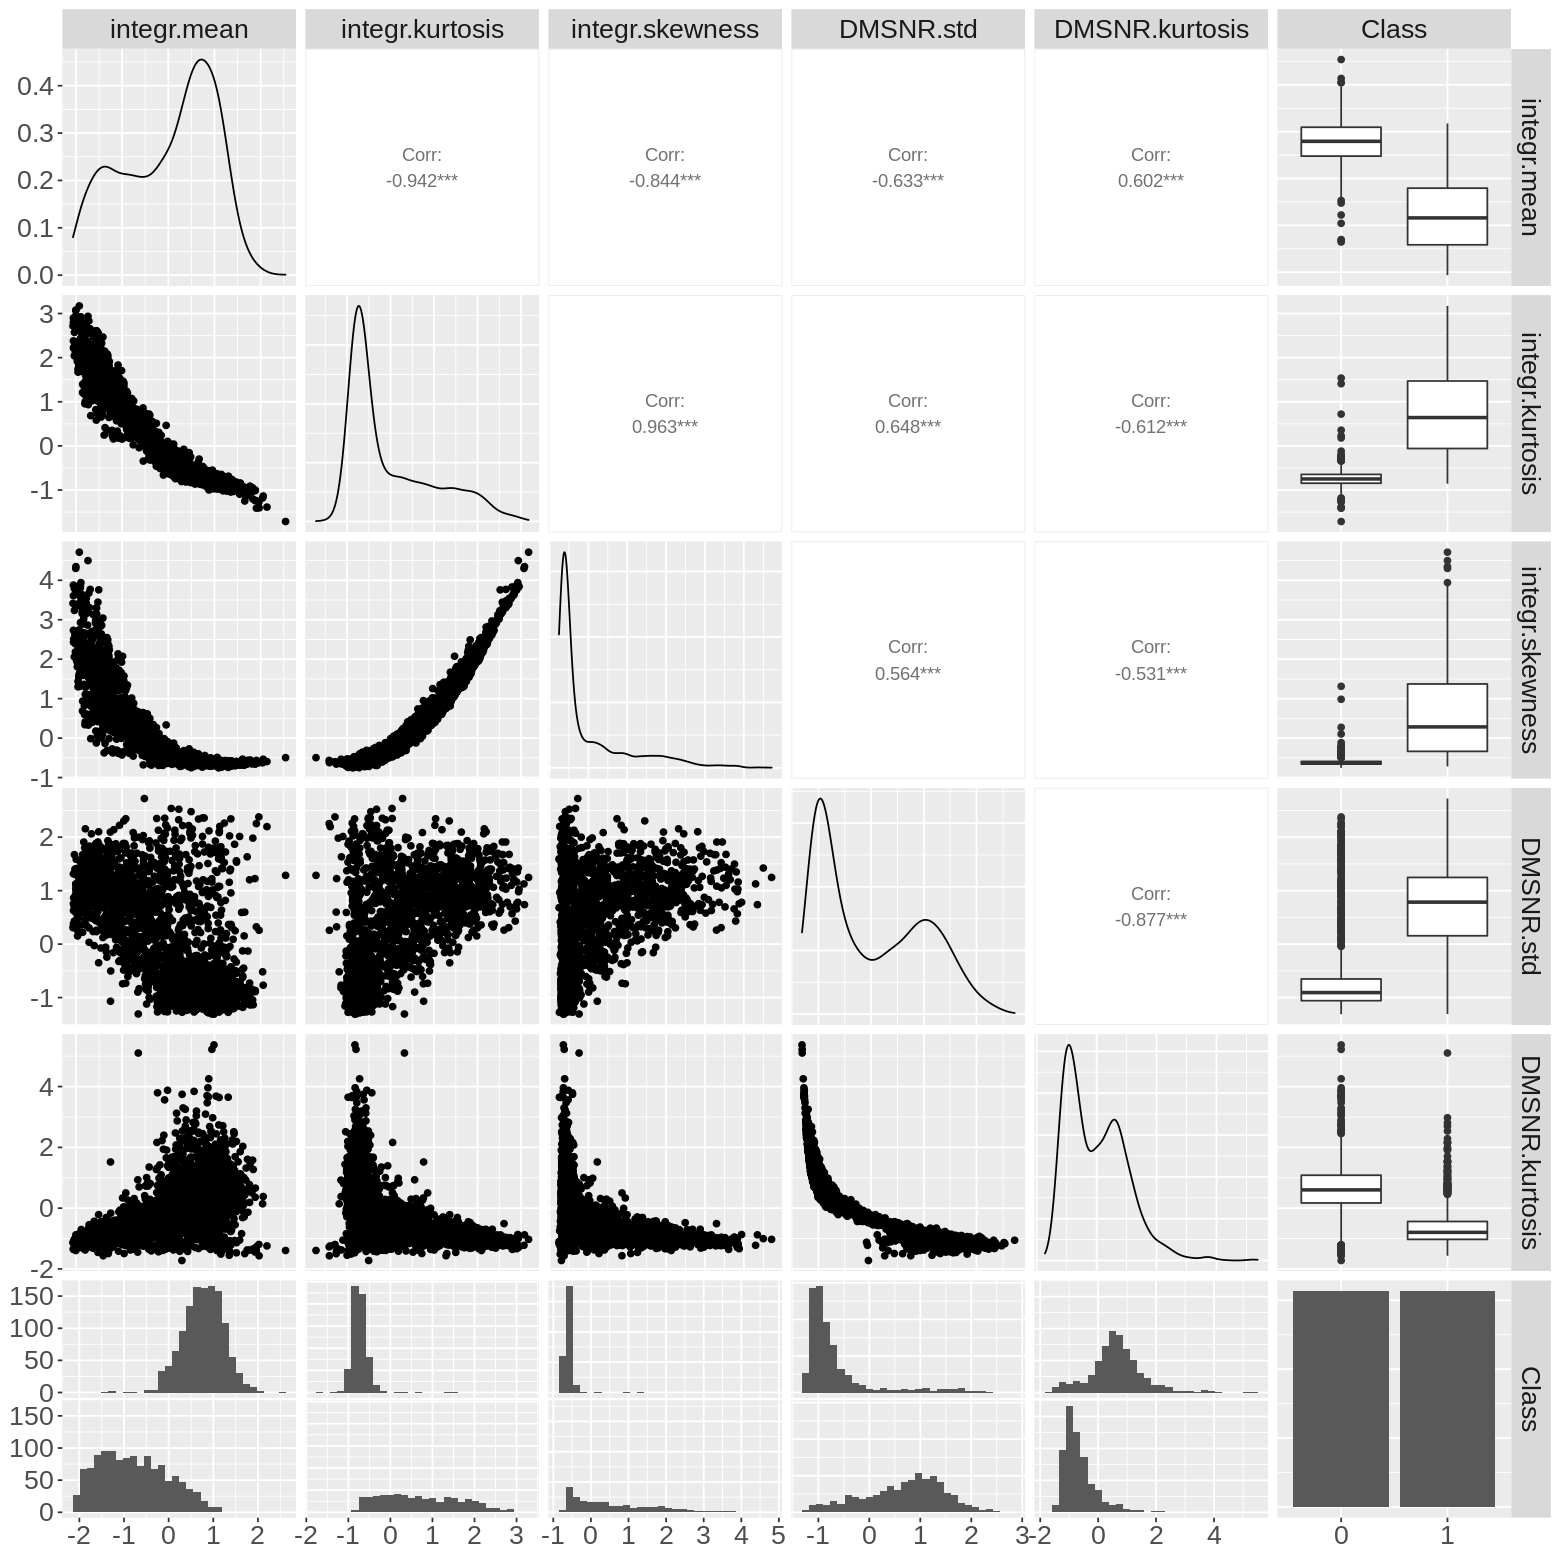

In [38]:
## ggpair plot - check the correlation between each variables in the training set
ggpairs(pulsar_training) + 
  theme(text = element_text(size=20))

There's multicollinearity problem between these predictors we choose since the correlations between each of them are quite high, especially between the `integr.mean`, `integr.kurtosis`, and `integr.skewness` predictors: absolute correlations are higher than 0.7, indicating strong correlation between them. In addition, predictors `DMSNR.std` and `DMSNR.mean` also have strong correlation.

## Additional analysis with PCA (Principal Component Analysis)

#### to deal with the multicollinearity problem
#### also help reduce the dimensionality of our model: 8 dimensions -> 2 dimensions
#### use the lower dimension to cover most of the variance in data

In [39]:
pulsar_df <- mutate(pulsar, Class = as.factor(Class))
X <- select(pulsar_df, integr.mean:DMSNR.skewness) # use all the predictors
# PCA
pulsar_pca <- prcomp(X, scale = TRUE) # scale the dataset
summary(pulsar_pca) 

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0332 1.4644 0.8996 0.67633 0.50816 0.39985 0.14298
Proportion of Variance 0.5168 0.2681 0.1012 0.05718 0.03228 0.01998 0.00256
Cumulative Proportion  0.5168 0.7848 0.8860 0.94318 0.97546 0.99544 0.99800
                          PC8
Standard deviation     0.1266
Proportion of Variance 0.0020
Cumulative Proportion  1.0000

####  visualization for PCA

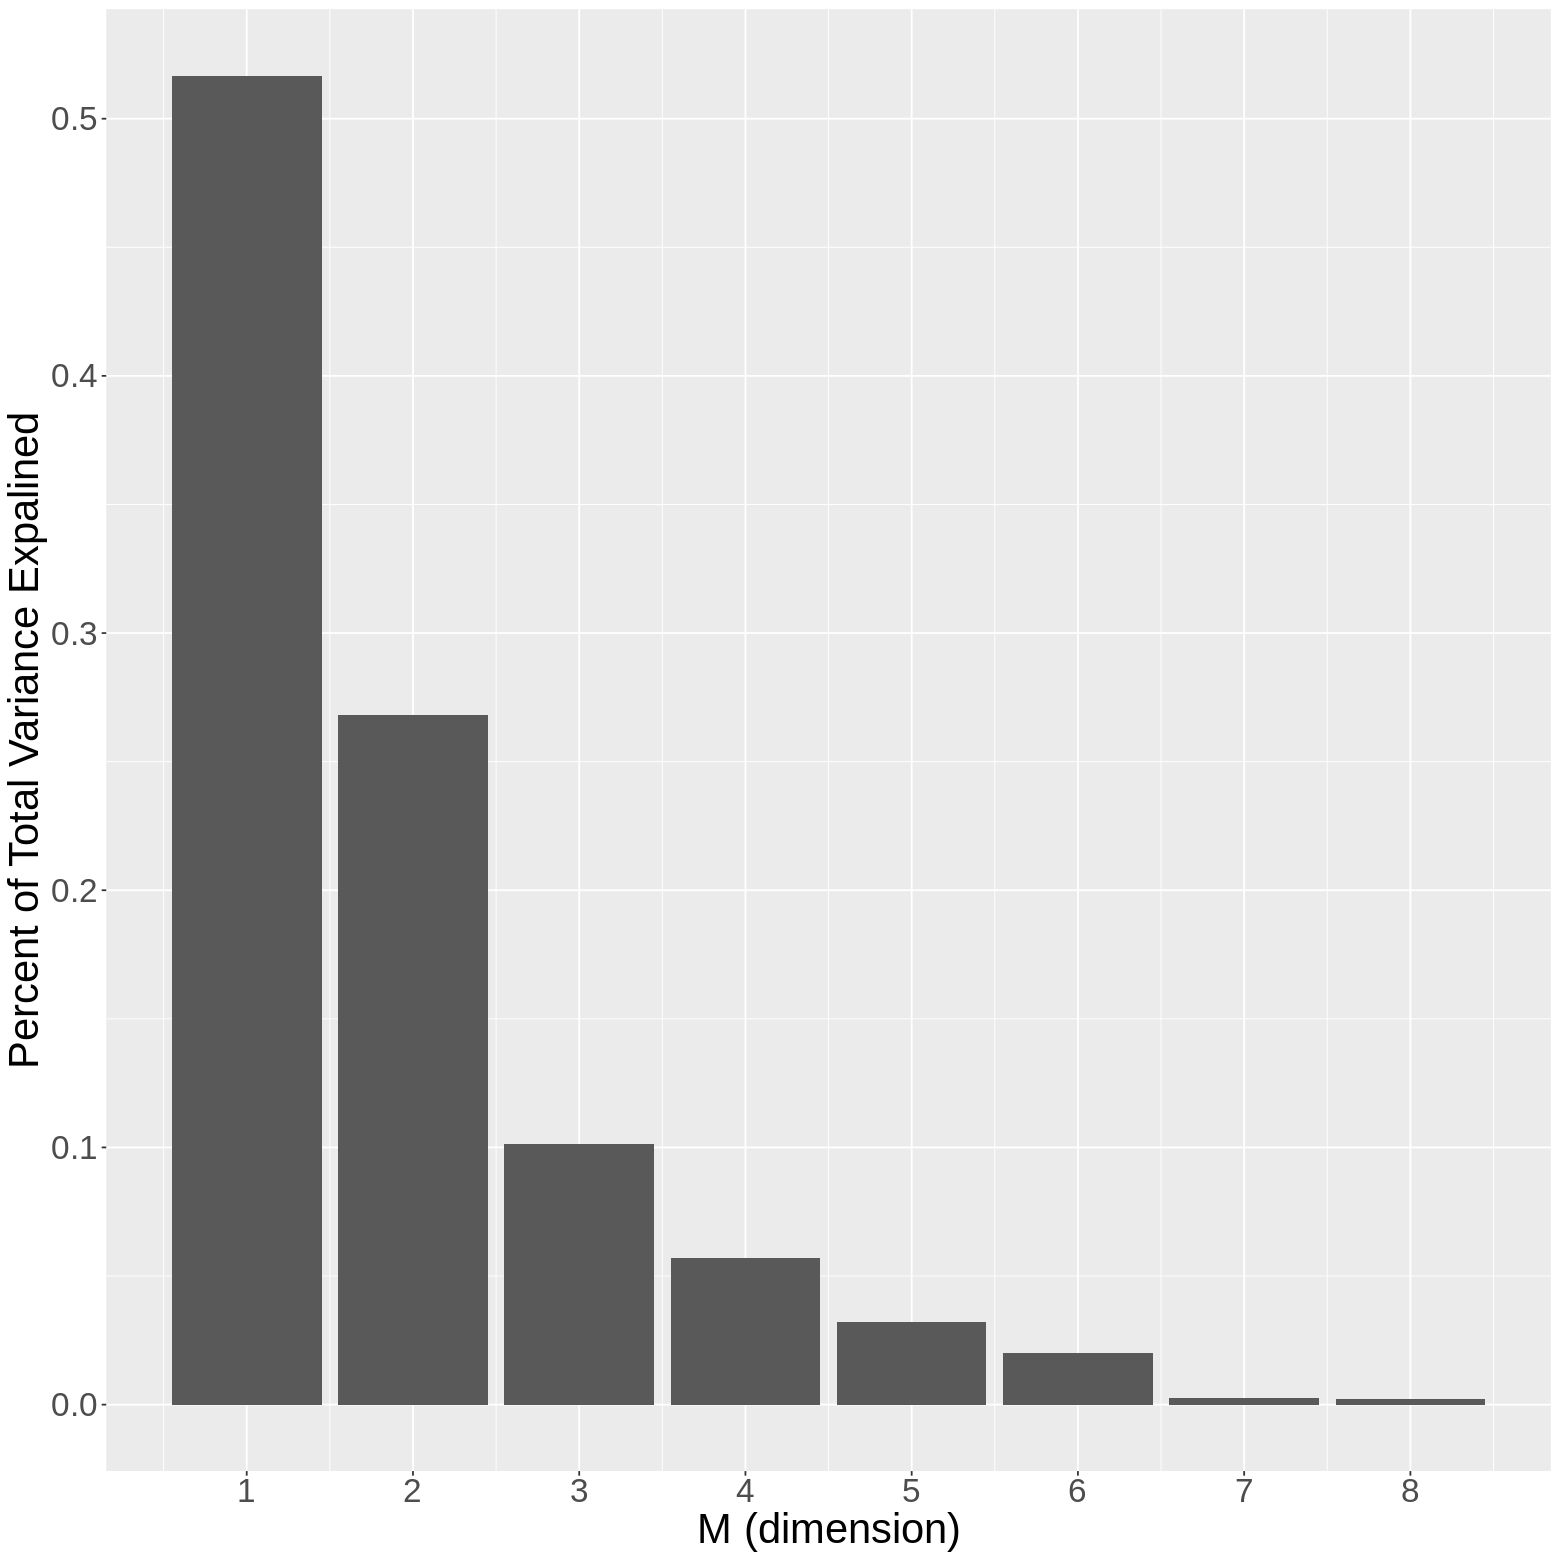

In [40]:
# screeplot
data.frame(dim = 1:ncol(X), 
           var_explained = pulsar_pca$sdev^2 / sum(pulsar_pca$sdev^2)) %>%
  ggplot(aes(x = dim, y = var_explained)) + 
  geom_bar(stat = "identity") + 
  labs(x = "M (dimension)", 
       y = "Percent of Total Variance Expalined", 
       main = "scree plot for PCA") + 
  scale_x_continuous(breaks = 1:ncol(X)) + 
  theme(text = element_text(size=25))

- the first two principal components explained about 78% of variance
- use 2 dimensions seems reasonable

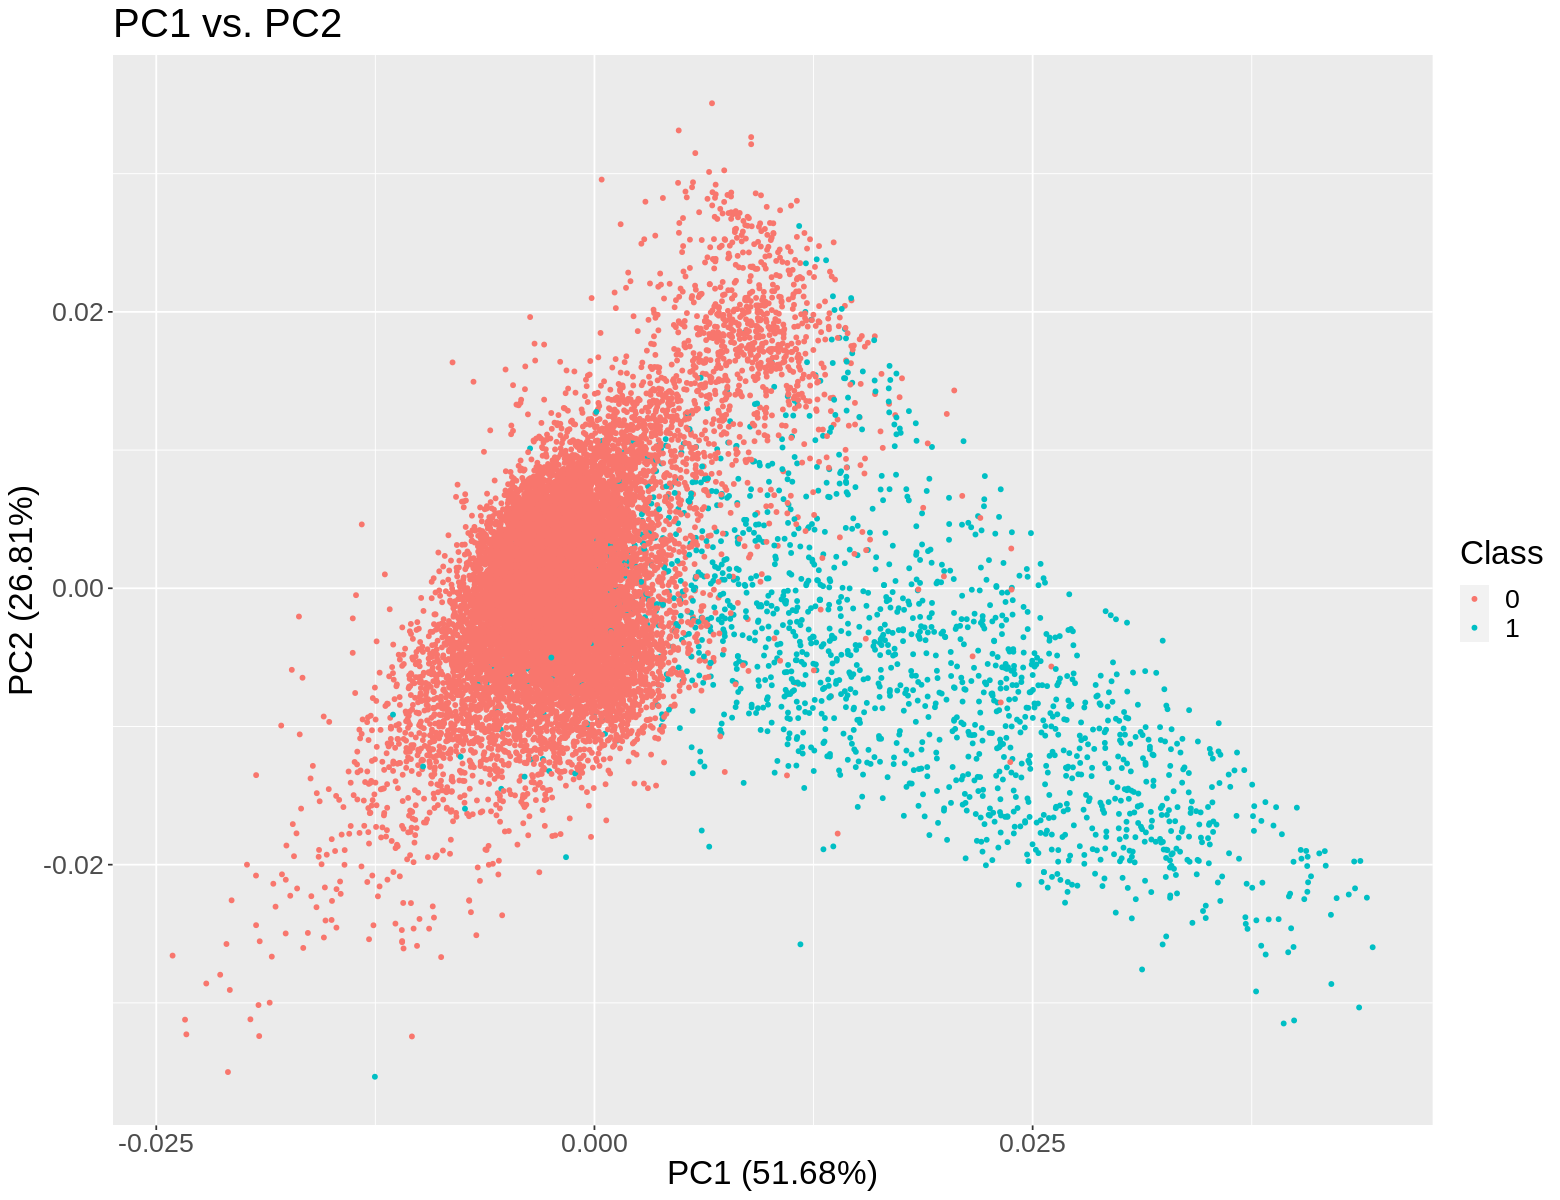

In [57]:
autoplot(pulsar_pca, data = pulsar_df, colour = 'Class', size = 1, main = "PC1 vs. PC2") + 
    theme(text = element_text(size=20)) 

- With the first two principal components,  the plot of PC1 vs PC2 shows that there is clear separation between the Class 0 and Class 1:

especially on PC1, most of observations from Class 1 lies on positive value of PC1 and Class 0 lies on negative value of PC1.

- This is a clear indication that the data is suitable for some kind of classification model with just the two dimensions.

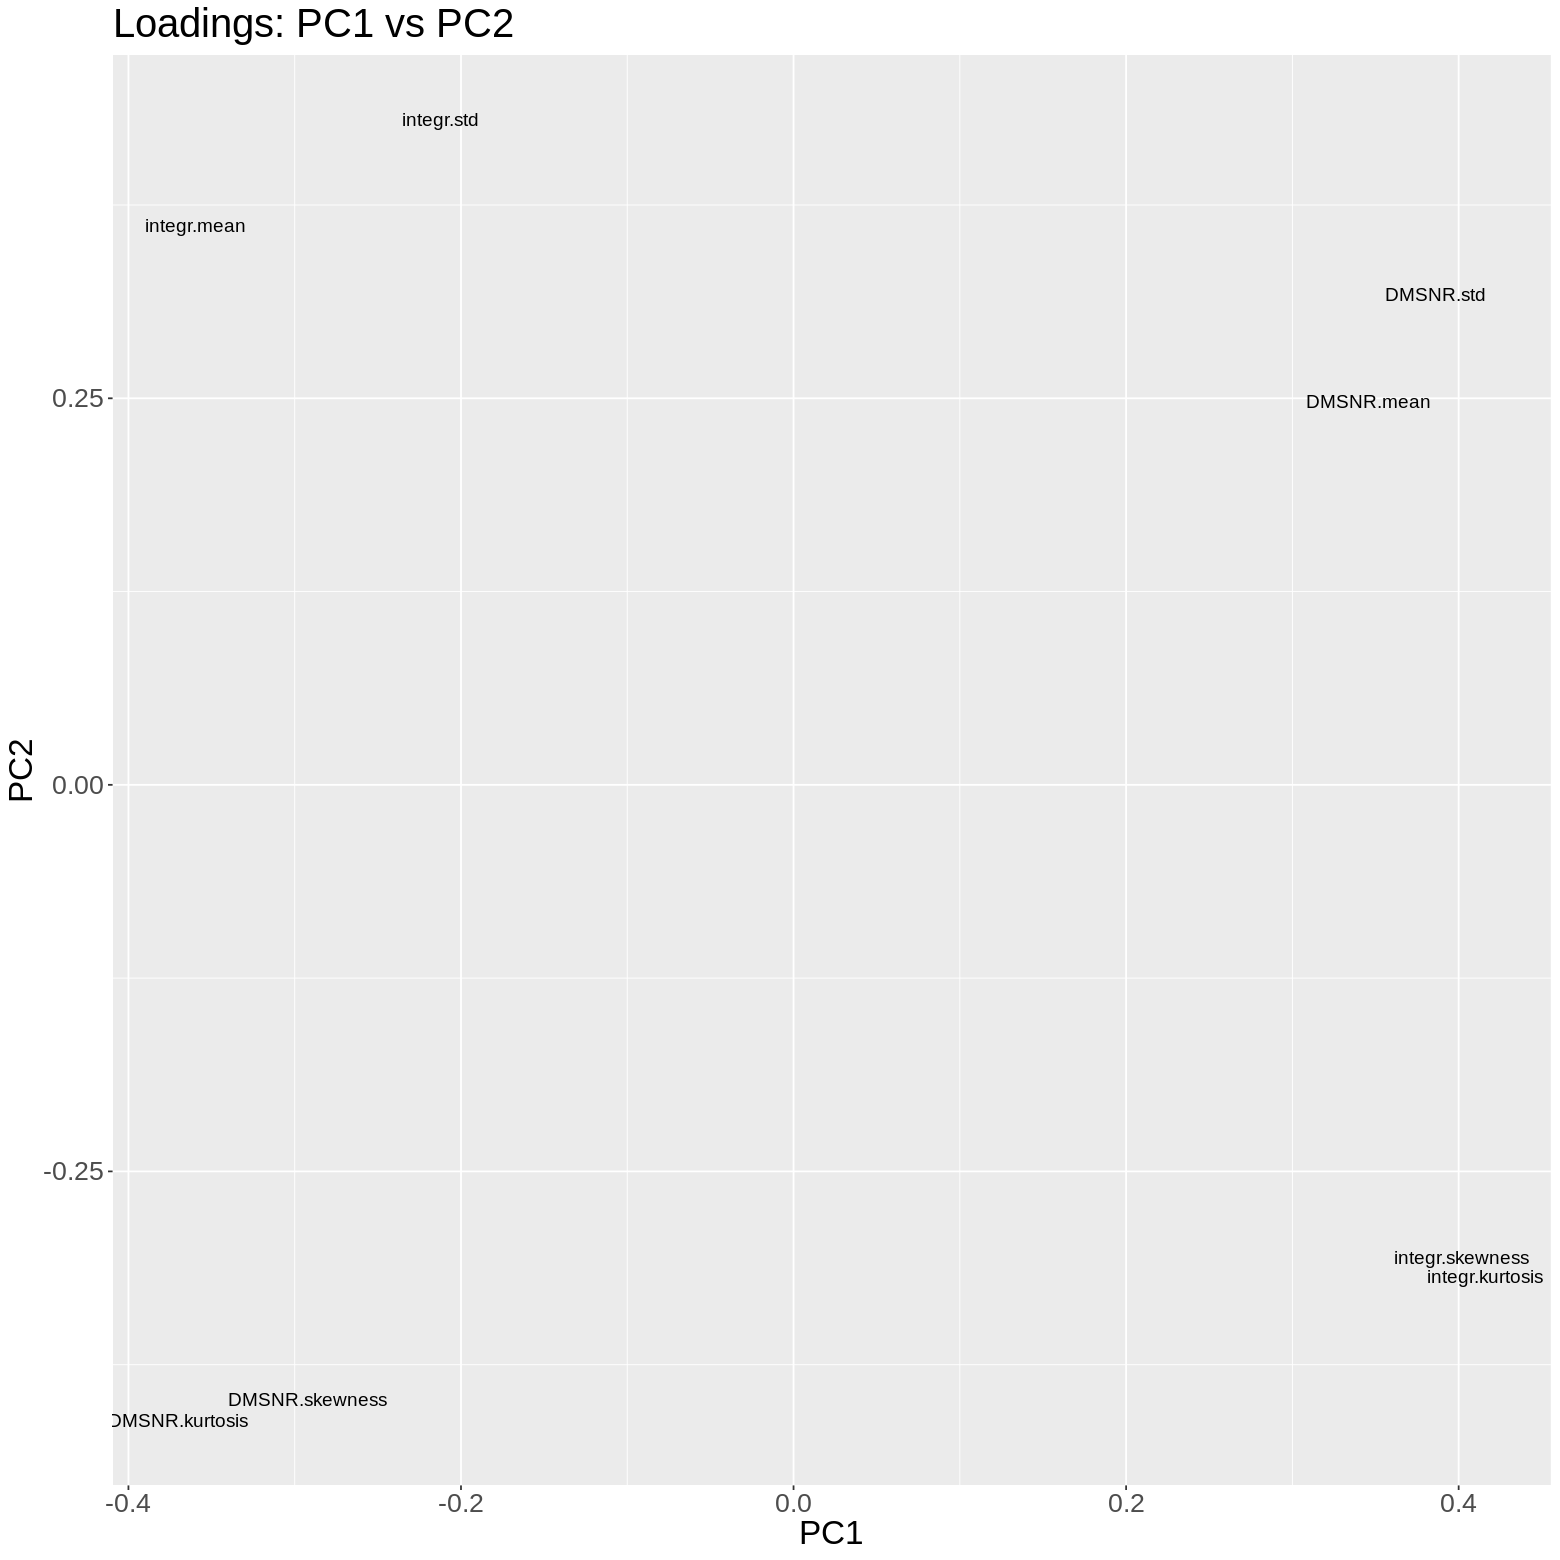

In [42]:
data.frame(pulsar_pca$rotation[, 1:2], 
           predictors = rownames(pulsar_pca$rotation)) %>%
  ggplot(aes(PC1, PC2, label = predictors)) + 
  geom_text(cex = 4) + 
  ggtitle("Loadings: PC1 vs PC2") + 
  theme(text = element_text(size=20))

This plot show loadings on each predictors on the first two PCs:

- large values of PC1 are associated with DMSNR.std, DMSNR.mean and integrated.skewness, integrated.kurtosis;

- large values of PC2 are associated with integrated.mean and integrated.std

- negative values of PC1 and PC2 are associated with DMSNR.skewness and DMSNR.kurtosis

- All features seem important for the first two principal components

#### split the data into training and testing sets

In [43]:
# combine PC1 and PC2 with the original dataset
df <- data.frame(pulsar_pca$x[, 1:2], pulsar_df)

set.seed(123)
df_split <- initial_split(df, prop = 0.75, strata = Class)  
df_train <- training(df_split)   
df_test <- testing(df_split)

In [44]:
# dimension of training set and count the number of observations in each Class
dim(df_train)
count_train <- df_train %>% 
  group_by(Class) %>% 
  summarise(n=n()) %>%
  mutate(freq = n / nrow(df_train))
count_train

[1] 13423    11

Class,n,freq
<fct>,<int>,<dbl>
0,12170,0.90665276
1,1253,0.09334724


In [45]:
# same imbalancing problem - sample down the 0 class in the df_train 
set.seed(123)
# train_c1 <- filter(pulsar_train, Class == 1)
# train_c0 <- filter(pulsar_train, Class == 0)
df_train_c1 <- filter(df_train, Class == 1)
df_train <- df_train %>% 
  filter(Class == 0) %>%
  sample_n(nrow(df_train_c1)) %>%
  rbind(df_train_c1)

#### Visualization for the training set with PCA

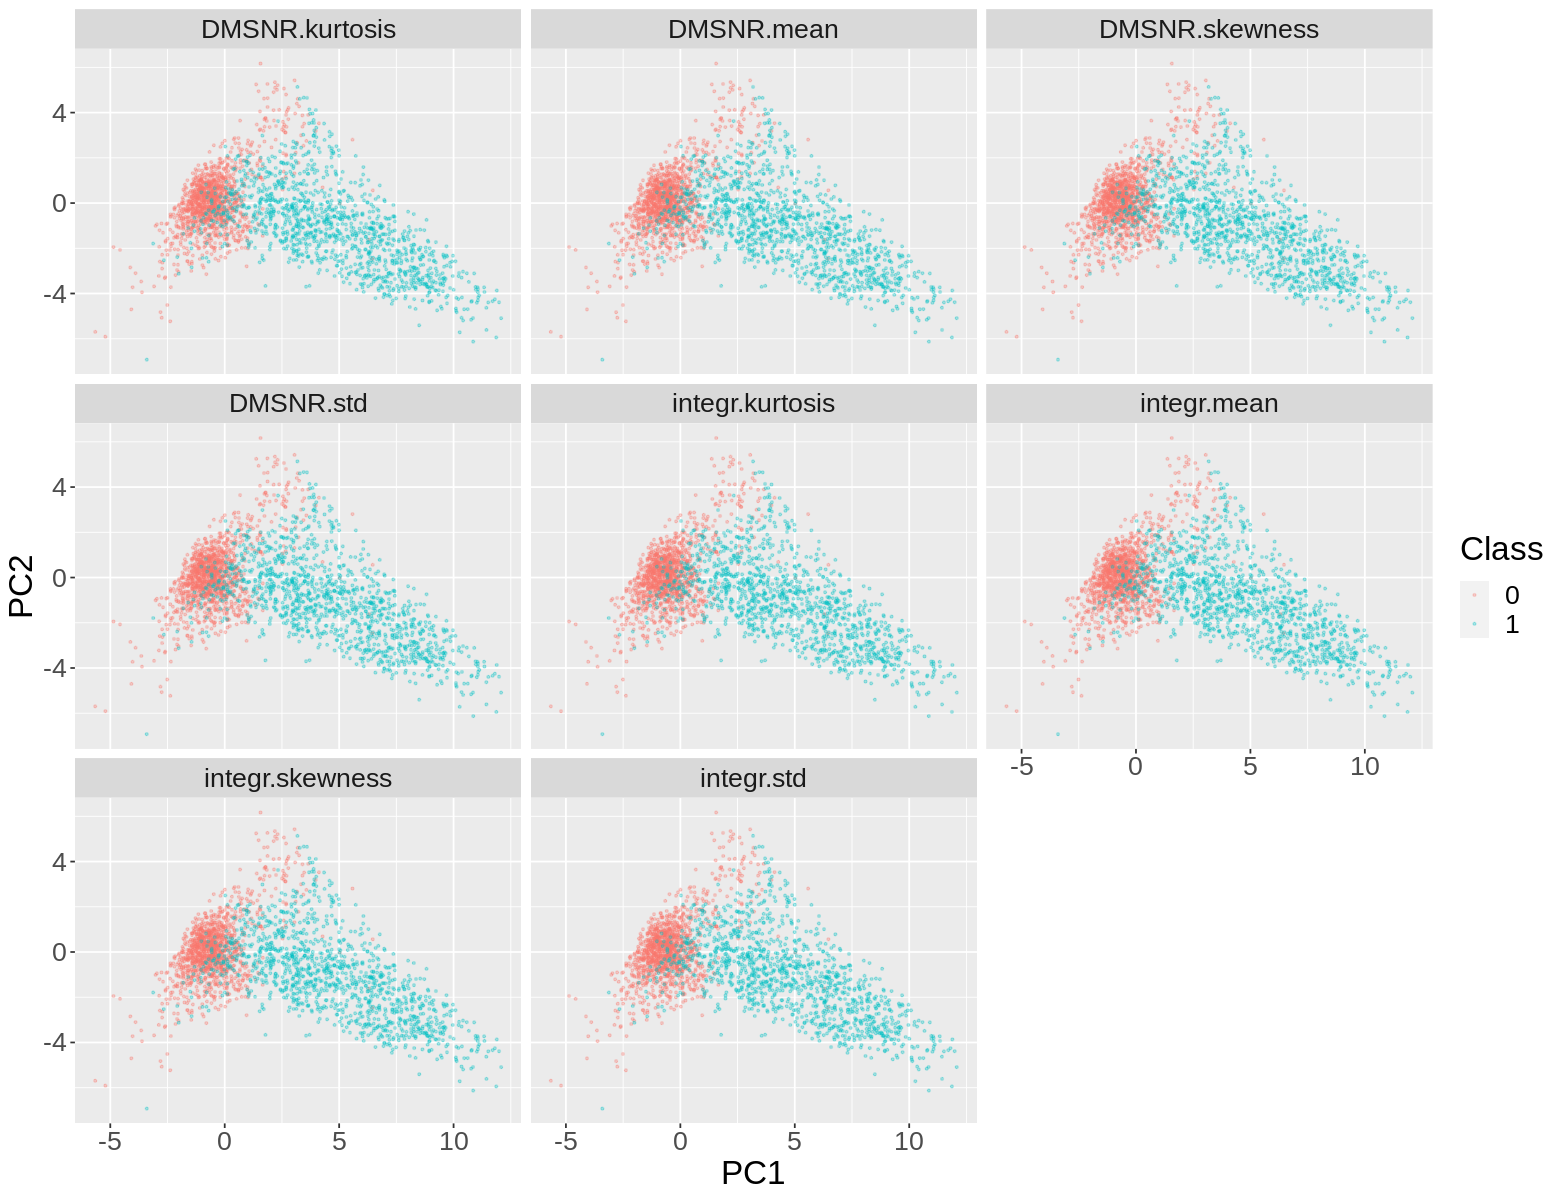

In [46]:
options(repr.plot.width = 13, repr.plot.height = 10) 
df_train %>% 
  pivot_longer(cols = integr.mean:DMSNR.skewness,
               names_to = "predictors") %>%
  ggplot() + 
  geom_point(aes(x = PC1, y = PC2, color = Class), size = 0.5, alpha = 0.3) + 
  facet_wrap(~predictors) + 
  labs(color = "Class") + 
  theme(text = element_text(size=20))

In each predictors, there's also a clear seperation between the two classes we want to classify. And the distributions are the same as in the original dataset.

### CLASSIFICATION: KNN

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8770889,10,0.004970919,Preprocessor1_Model01
21,accuracy,binary,0.9210000,10,0.005097690,Preprocessor1_Model02
41,accuracy,binary,0.9190127,10,0.005021463,Preprocessor1_Model03
61,accuracy,binary,0.9190095,10,0.005199974,Preprocessor1_Model04
81,accuracy,binary,0.9210032,10,0.004536779,Preprocessor1_Model05
101,accuracy,binary,0.9198063,10,0.004523169,Preprocessor1_Model06
121,accuracy,binary,0.9206095,10,0.004959444,Preprocessor1_Model07
141,accuracy,binary,0.9198095,10,0.004512944,Preprocessor1_Model08
161,accuracy,binary,0.9170254,10,0.004626518,Preprocessor1_Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
81,accuracy,binary,0.9210032,10,0.004536779,Preprocessor1_Model05


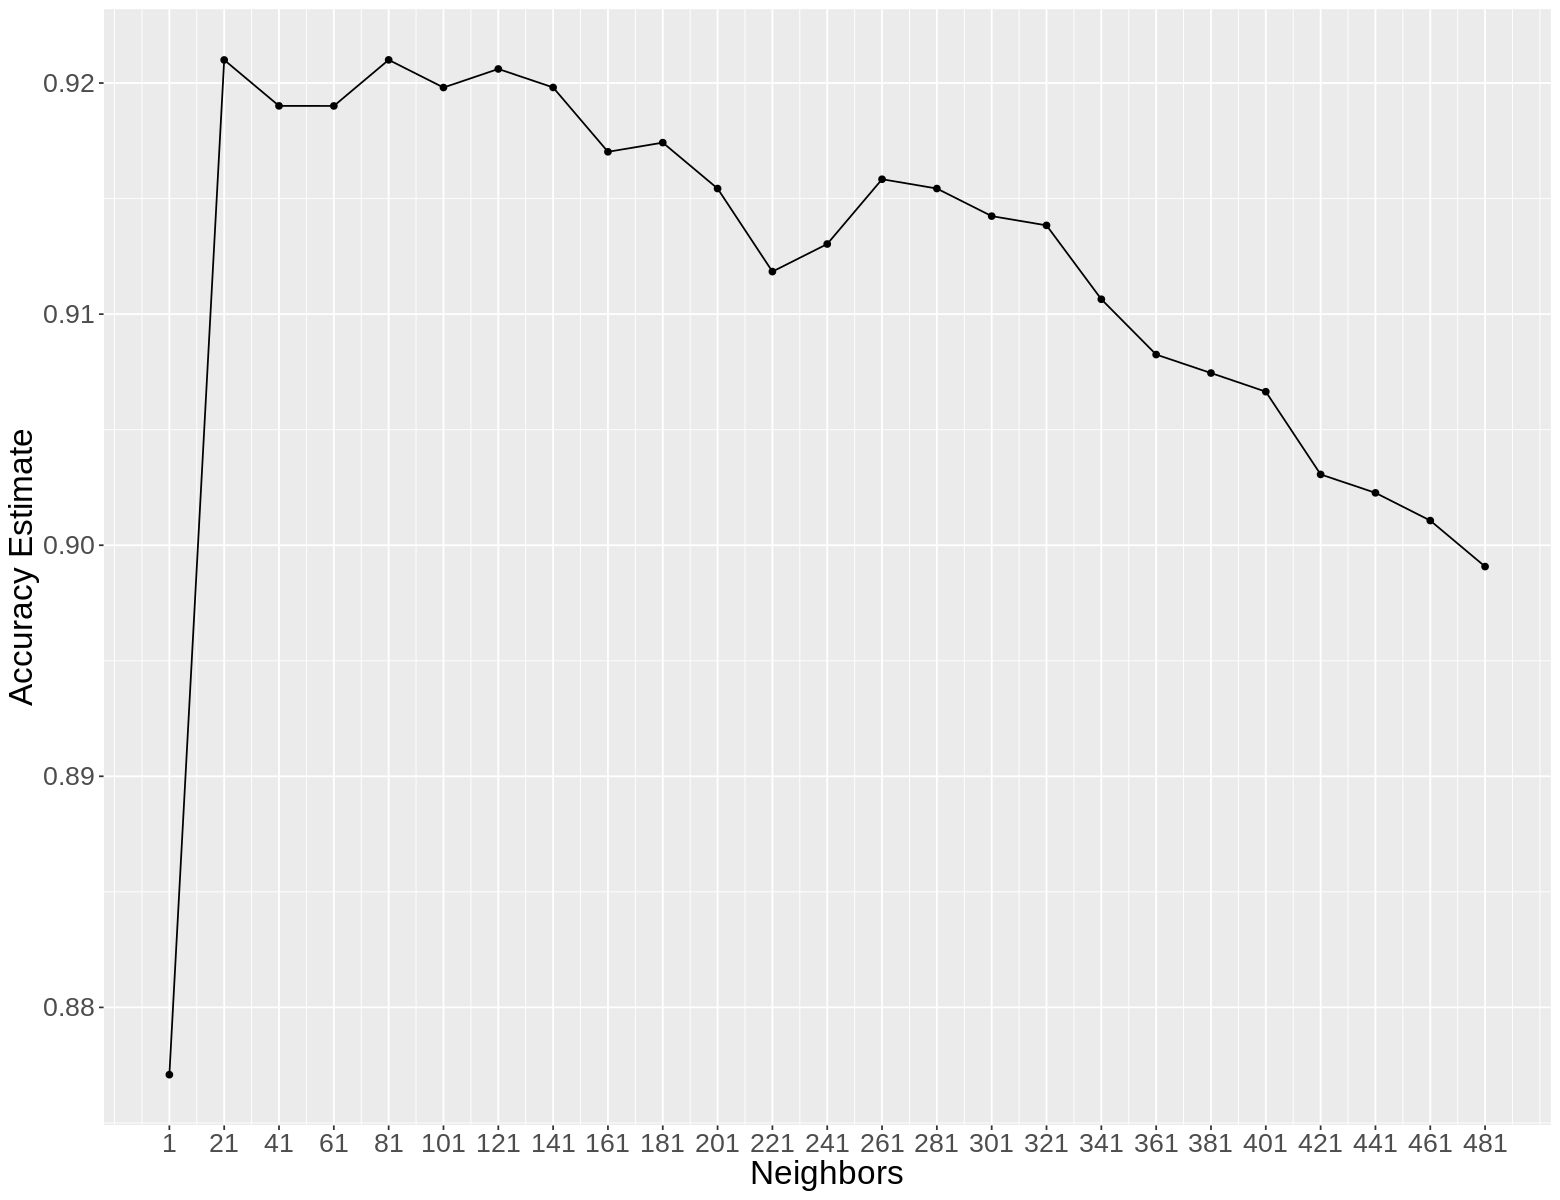

In [47]:
df_train <- select(df_train, PC1, PC2, Class)
set.seed(123)
pca_recipe <- recipe(Class ~ PC1 + PC2 , data = df_train) 
## tuning the parameter
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")
# try K with different values:  1 to 500 (stepping by 20)
ks <- tibble(neighbors = seq(from = 1, to = 500, by = 20))
# 10 cross validation
vfold <- vfold_cv(df_train, v = 10, strata = Class)
pca_knn_results <- workflow() %>%
  add_recipe(pca_recipe) %>%
  add_model(knn_tune) %>%
  tune_grid(resamples = vfold, grid = ks) %>%
  collect_metrics() 
pca_acc <- pca_knn_results %>%
  filter(.metric == "accuracy")
# accuracy vs k plot
ggplot(pca_acc, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", main = "Accuracy VS K") + 
  theme(text = element_text(size = 20)) + 
  scale_x_continuous(breaks = ks$neighbors)
# get the best k
pca_acc
pca_acc[which.max(pca_acc$mean), ]
best_pca_k <- pca_acc[which.max(pca_acc$mean), ]$neighbors

In [48]:
# build the model using the best k choose from examine the accuracies
set.seed(123)
pca_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_pca_k) |>
  set_engine("kknn") %>%
  set_mode("classification")
pca_pulsar_fit <- workflow() %>%
  add_recipe(pca_recipe) %>%
  add_model(pca_spec) %>%
  fit(data = df_train)

# predict the test set
pca_preds <- predict(pca_pulsar_fit, df_test) %>%
  bind_cols(df_test)
# prediction accuracy
pca_preds %>% 
  metrics(truth = Class, estimate = .pred_class) %>%
  filter(.metric == "accuracy") 
# confusion matrix
pca_preds %>%
  conf_mat(truth = Class, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9617877


          Truth
Prediction    0    1
         0 3982   64
         1  107  322

The accuracy is about 96%, which means that 96% of the predicted class is the same as the actual class and only 4% of the time we make mistakes.

##### Conclusion:
- Forward Selection: results in a model which is not good since the test error is so large

- Select predictors from correlation matrix: results a better model and can predict the testing set with relatively high accuracy scores. However, there's the `Multicollinearity Problem` since the correlation between each predictors are very strong. Also, larger features could result in `curse of dimensionality`, which occurs when large number of features deteriorate the performance of KNN. When we deal with dataset which has large features/dimensions, KNN algorithm choose k-nearest neighbors depends on distance function, regardless of the actual features of the dataset, thus as number of predictors increases, some of the nearest neighbor points may not actually near from the point we want to predict.

- PCA: can deal with the `Multicollinearity Problem` and `curse of dimensionality`.